# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

To access the newspapers in the zipfile, you must first use the Zipfile library to open the zipfile then iterate through the objects (newspapers) in the zipfile using .infolist(). Try and write a simple routine to just go through the zipfile, printing out the name of the file as well as using display(). Remember that the PIL.Image library can .open() files, and that items in .infolist() in the zipfile each appear to Python just as if they were a file (these are called "file-like" objects). 

 You can spend a lot of time converting between PIL.Image files and byte arrays, but you don't have to. Why not just store the PIL.Image objects in a global data structure, maybe a list or a dictionary indexed by name? Then you can further process this data structure, by adding in information such as the text detected on the pages or the bounding boxes behind faces. Come to think of it, a list of dictionary objects, where each entry in the list would have the PIL image, the bounding boxes, and the text discovered on the page, would be a handy way to store this data.
 
A quick reminder - in Python all strings are just like lists of characters. Kind of (remember they are immutable lists - more like tuples!). But this means you can use the in keyword to find substrings really easily. So the following statement will return True if the substring is matched: if "Christopher" in my_text

Creating the contact sheet can be a bit of a pain. But you can resize images without having to worry about the aspect ratio if you use the PIL.Image.thumbnail function. I used it when creating out the output images, maybe you should too! And check out the lecture on the contact sheet, you want to be careful that you don't "walk off" the end of the images when creating a row (or column).



In [15]:
import zipfile

from PIL import Image
from PIL import ImageOps
from PIL import ImageDraw

import pytesseract
import cv2 as cv
import numpy as np
import math

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you

In [16]:
extracted_images = {}

with zipfile.ZipFile('readonly/images.zip', 'r') as zipfiles:
    for file_entry in zipfiles.infolist():
        with zipfiles.open(file_entry) as file:
            img = Image.open(file).convert('RGB')
            extracted_images[file_entry.filename] = {'pil_img':img}
    

In [17]:
print (extracted_images)

{'a-0.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7FC8E42AE470>}, 'a-1.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7FC8AAEA2F98>}, 'a-10.png': {'pil_img': <PIL.Image.Image image mode=RGB size=6300x3600 at 0x7FC8AAEA2B00>}, 'a-11.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3150x3600 at 0x7FC8E4325710>}, 'a-12.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3150x3600 at 0x7FC8A96201D0>}, 'a-13.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3150x3600 at 0x7FC8A9620240>}, 'a-2.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7FC8A96202B0>}, 'a-3.png': {'pil_img': <PIL.Image.Image image mode=RGB size=7200x6300 at 0x7FC8A9620320>}, 'a-4.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7FC8A9620390>}, 'a-5.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7FC8A9620400>}, 'a-6.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7FC8A96204

In [18]:
#parse all images text
for img_name in extracted_images.keys():
    text = pytesseract.image_to_string(extracted_images[img_name]['pil_img'])
    extracted_images[img_name]['text'] = text
    print (text)

Che Michigan Daily

Ann Arbor, Michigan

Wednesday, November 5, 2014

michigandaily.com

BIG DAY FOR REPUBLICANS

SNYDER EARNS SECOND TERM; G.O.P. TAKES CONTROL OF U.S. SENATE

STATE

EXECUTIVE
GOVERNOR
Rick Snyder (R)

LIEUTENANT
GOVERNOR
Brian Calley (R)

SECRETARY OF
STATE
Ruth Johnson CR)

STATE
JUDICIAL

ATTORNEY GENERAL
Bill Schuette CR)

MICHIGAN
LEGISLATIVE

MICHIGAN STATE
SENATE
Rebekah Warren (D)

MICHIGAN HOUSE
OF REPRESENTATIVES
Jeff Irwin CD)

U.S.
LEGISLATIVE

U.S. SENATE
Gary Peters (D)

U.S. HOUSE OF
REPRESENTATIVES
Debbie Dingell (D)

WASHTENAW
COUNTY

PROBATE COURT
Julia Owdziej (D)

CIRCUIT COURT
Patrick Conlin (D)

ANN ARBOR
MAYOR
Christopher Taylor (D)

CITY COUNCIL

Sumi Kailasapathy (D)
Chuck Warpehoski (D)
Julie Grand (D)
Graydon Kraphol (D)
Kirk Westphal (D)

REGENTS

Too close to call

HI: 51
LO: 30

WEATHER
TOMORROW

 

 

‘alll ai

TOP: Republican Gov. Rick Snyder celebrates after being reelected to a second term at the Renaissance Center in Detroit JAMES CO

| 4B | Wednesday, November 5, 2014 // The Statement

Wednesday, November 5, 2014 // The Statement

 

RUBY WALLAU/ Daily

     
 

arly on a Saturday, students and faculty

boarded a bus outside the University’s

School of Public Health. The destination
— Detroit.

However, this group wasn’t going to visit the
tourist hotspots. While Eastern Market and the
Renaissance Center were on the itinerary, these
participants had signed up to see some of the
most polluted and industrialized areas of the
city, hear about the historic factors that brought
the city to its current state and to learn about
the public health concerns for residents in these
areas.

“Detroit’s a challenging place — it’s an inter-
esting place,” said Sociology Prof. Reynolds Far-
ley, one of the trip leaders for the 2014 Tour of
Toxic Sites, sponsored by the University’s Center
for Occupational Health and Safety Engineering.

For better or worse, the city has for decades
been used as a case study for some of society’s
mo

| 6B | Wednesday, November 5, 2014 // The Statement

 

Do U.S. colleges have something to learn from German tuition policy?
by Rachel Premack

en German universities began

charging tuition in 2006, the back-

lash was swift. At the University of

Freiburg, where University of Michigan His-

tory Department Chair Kathleen Canning

was administering a study abroad program in

the 2000s, students occupied classrooms and

hung enormous banners that read, “Education
is a human right.”

The fees that caused the outrage? An aver-
age of $630 per semester. At this University,
in-state LSA students pay $6,579 and out-
of-staters pay $20,789.

“It didn’t matter how much it was,”
Canning said. “It didn’t matter that it was
affordable for most middle-class fami-
lies. It was the principal of introducing
tuition.”

Lucky for the students, the final Ger-
man federal state abolished tuition in
October. Now anyone — German citizen
or not — can receive a free college educa-
tion at one of Germany’s g

Wednesday, November 5, 2014 // The Statement

Personal Statement: Falling in love behind closed doors

 

e met in the student jour-
nalism office at our subur-
ban high school. She was

on the yearbook staff, a grade older;
I was an editor for the newspaper. It
was like forbidden love. More on that
later.

A year earlier, another newspa-
per writer and I had lost a lengthy
battle with our high school’s admin-
istration over the fate of the news-
paper class. Over time, we fought
their decision to cut the class by
reincarnating the newspaper as an
after school club. At that time, I had
no idea how important this organi-
zation, the office from which it was
run and everything that came out of
it would be in my life.

We officially met on Valentine’s
Day: Feb. 14, 2011. It was sophomore
year: the year I had a crush on Dar-
ren Criss, worked backstage at my
high school’s production of Seussical
the Musical and took AP U.S. His-
tory. Though I recognized her face
from all of the afternoons

4A, 5A — Wednesday, November 5, 2014

The Michigan Daily — michigandaily.com

 

 

LUNA ANNA ARCHEY/Daily

Ann Arbor Mayor elect Chris Taylor interacts with supporters at a watch party at the Ann Arbor Brewing Company Tuesday.

After eight years, Republicans take control of Senate

Experts predict
worsening gridlock
in Washington

By SAM GRINGLAS
Daily News Editor

After eight years in the
minority, the Republican Party
has regained control of the U.S.
Senate.

Seven Republican  candi-
dates have captured Democrat-
ic seats in Arkansas, Colorado,
Towa, Montana, North Carolina,
South Dakota and West Vir-
ginia. The Republican majority
could widen, pending a Decem-
ber runoff in the Louisiana sen-
ate race.

For the first time since 1994,
Republicans will control both
houses of Congress with a Dem-
ocratic president in the White
House.

Both of Michigan’s Senate
seats remain in Democratic
hands. In a race that was once
seen as a potential pick-up for
the Republicans, U.S. Rep. Gary
Pete

6A — Wednesday, November 5, 2014

The Michigan Daily — michigandaily.com

 

‘Half’ the intrigue

CBS sitcom
disappoints in final
season premiere

By KAREN HUA
Daily Arts Writer

This past Thursday, the
iconic sitcom “Two and a Half
Men” premiered its twelfth and

final season.

The show

historically

has been one Two and a
of the most

beloved and Half Men
highly-rated on Season 12
television, but Premiere

in recent years
hasseenseveral Thursdays

ups and downs. at9p.m.

At this point, ps5

it seems like

CBS continues

to renew the show simply for
the sake of tradition. While it
is true “Men” has become a
sort of American legend, the
show’s audience is waning and
demonstrates little potential for
growth.

Now with the absence of
Charlie (Charlie Sheen, “Anger
Management”), many viewers
have turned away, even with the
younger, cleaner Walden (Ashton
Kutcher, “No Strings Attached”)
as asubstitute. With Alan’s John
Cryer, “Pretty in Pink”) brother
gone, and his son Jake (Angus
T. Jone

The Michigan Daily — michigandaily.com

Michigan’s best-

By ALEXA DETTELBACH
Daily Sports Editor

Early in the second quarter
against Indiana, quarterback
Devin Gardner found himself
under duress in the pocket. While
going through his progressions
behind center, the fifth-year
senior locked in on receiver
Amara Darboh running a route
near the right sideline.

Just as Gardner let go of the
ball, the Hoosiers’ linebacker
in coverage jumped the route
and appeared to have the ball in
his hands with an easy path to
the end zone. Instead, Darboh
knocked the ball loose and
prevented the pick six.

“I was kind of thinking ...
hit the arm cause I hear the
(defensive backs) coach say that
all the time. So I just kind of tried
to swipe and hit the arm and I’m
thankful he didn’t get the pick,”
Darboh said after the game.

Darboh has been arguably the
best-kept secret of Michigan’s
offense this season. The receiver
put that talent on display against
Indiana, leading the offense with
nine reception

8A — Wednesday, November 5, 2014 EI . Ni h The Michigan Daily — michigandaily.com
ection Nignt

 

 

UPPER LEFT: LSA freshman Maks Muno votes at the polling station at Palmer Commons (PAUL SHERMAN/ Daily).

LOWER LEFT: U.S. Representative-elect Debbie Dingell (D) speaks to supporters at the Michigan Democratic Party's election night party at the MGM Grand in Detroit (AMANDA ALLEN/Daily).

UPPER RIGHT: Republican Gov.v Rick Snyder gives a victory speech at the Michigan Republican Party's election night watch party at the Detroit Marriott Hotel at the Renaissance Center (JAMES COLLER/Daily).
LOWER RIGHT: A supporter waves an American flag at the Michigan Republican Party's election night watch party (JAMES COLLER/Daily).

 

3% ~ LAND

how campus voted
OTHER PROPOSALS
OTHER ~SCHAUER 4%
~
y~ 48% May
EP ONCE, oe BYES
 ——r *

  
  

  

U.S. SENATE

 

GOVERNOR

U.S. HOUSE 2
wy BOWMAN ‘on mms
23% *

 

 

a

county-by-county

| =) Oi OFF Baia breakdown

ALL CRAFT DRAFT THURSDAY of the race

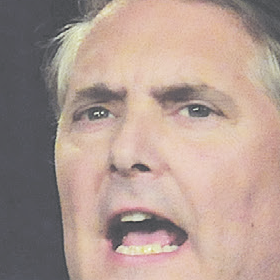

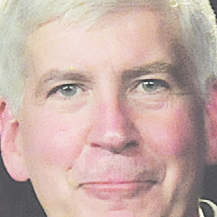

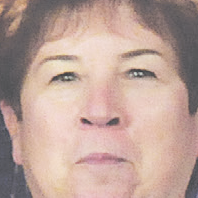

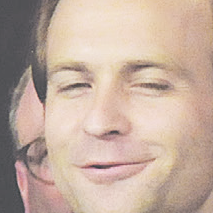

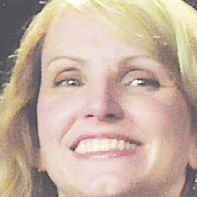

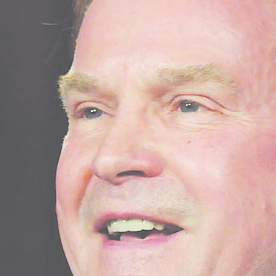

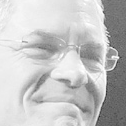

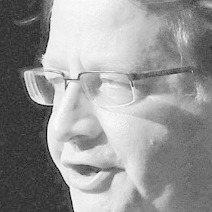

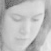

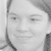

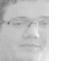

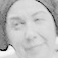

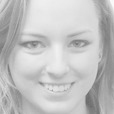

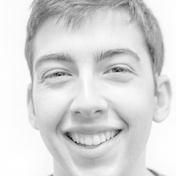

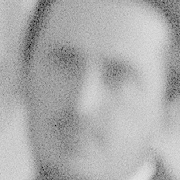

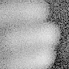

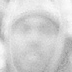

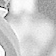

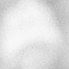

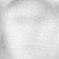

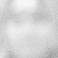

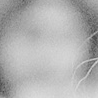

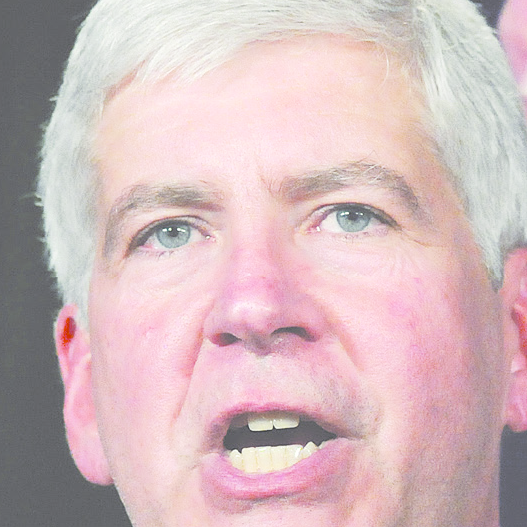

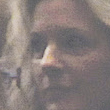

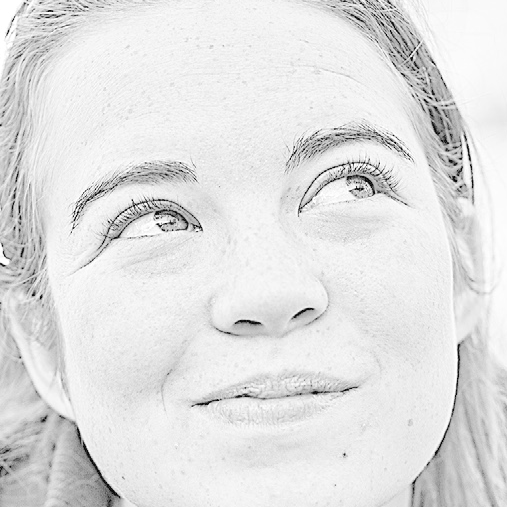

In [47]:
#detect faces in each image and draw box
for img_name in extracted_images.keys():
    open_image = np.array(extracted_images[img_name]['pil_img']) 
    img_gray = cv.cvtColor(open_image, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
    extracted_images[img_name]['faces'] = []
    for x,y,w,h in faces:
        face = extracted_images[img_name]['pil_img'].crop((x,y,x+w,y+h))
        extracted_images[img_name]['faces'].append(face)
        display(face)

In [48]:
#generate thumbnails
for img_name in extracted_images.keys():
    
    for face in extracted_images[img_name]['faces']:
        
        face.thumbnail((100,100),Image.ANTIALIAS)

In [50]:
#search for a name in text and return faces 
def search(keyword):   
    for img_name in extracted_images:
        if (keyword in extracted_images[img_name]['text']):
            if(len(extracted_images[img_name]['faces']) != 0):
                print("Result found in file {}".format(img_name))
                h = math.ceil(len(extracted_images[img_name]['faces'])/5)
                contact_sheet=Image.new('RGB',(500, 100*h))
                
                x = 0
                y = 0
                for img in extracted_images[img_name]['faces']:
                    contact_sheet.paste(img, (x, y))
                    if x + 100 == contact_sheet.width:
                        x = 0
                        y += 100
                    else:
                        x += 100
                        
                display(contact_sheet)
            else:
                print("Result found in file {} \nBut there were no faces in that file\n\n".format(img_name))
    return

Search name:Christopher
Result found in file a-0.png


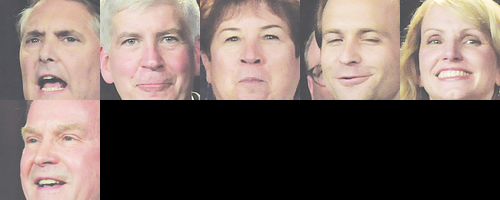

Result found in file a-3.png


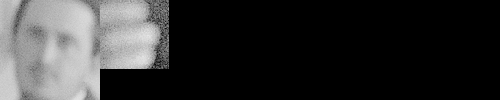

In [53]:
#enter search term and search
searchterm=input("Search name:")
search(searchterm)

Search name:Mark
Result found in file a-0.png


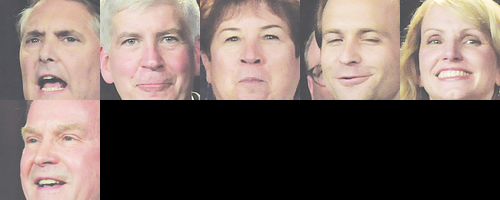

Result found in file a-1.png


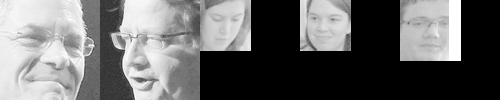

Result found in file a-10.png 
But there were no faces in that file


Result found in file a-13.png


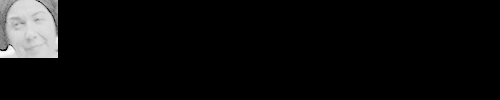

Result found in file a-2.png


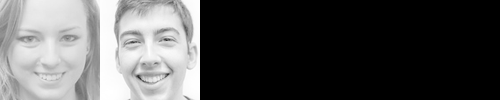

Result found in file a-3.png


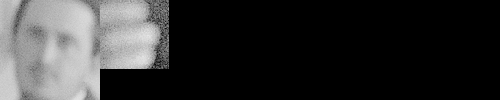

Result found in file a-8.png 
But there were no faces in that file




In [54]:
searchterm=input("Search name:")
search(searchterm)